In [127]:
import sklearn
print(sklearn.__version__)

1.3.0


- 분류 : 대표적인 지도학습 방법 중 하나. 명확한 정답이 있는 데이터를 먼저 학습한 뒤 미지의 정답 예측. 
- 하이퍼 파라미터 : 머신러닝 알고리즘별로 최적의 학습을 위해 직접 입력하는 파라미터. 머신러닝 알고리즘 튜닝.

In [128]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [129]:
import pandas as pd

iris = load_iris()

iris_data = iris.data

iris_label = iris.target

df = pd.DataFrame(data=iris_data, columns=iris.feature_names)
df['label'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [130]:
X_train, X_test, y_train, y_test = train_test_split(iris_data, iris_label, test_size=0.2, random_state=11)
 #수행할 때마다 같은 학습/테스트용 데이터 생성

In [131]:
dt_clf = DecisionTreeClassifier(random_state=11) #객체 생성

dt_clf.fit(X_train,y_train) #학습

DecisionTreeClassifier(random_state=11)

In [132]:
pred = dt_clf.predict(X_test) #예측

In [133]:
from sklearn.metrics import accuracy_score

print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test, pred))) #평가

예측 정확도: 0.9333


### 사이킷런의 기반 프레임 워크 익히기

- Estimator : Regressor와 Classifier 통칭. 지도학습의 모든 알고리즘을 구현한 클래스.
- fit() : 학습
- predict() : 예측
- 사이킷런의 비지도학습(차원축소, 클러스터링, 피처 추출) 도 fit, predict 적용하되, fit은 입력 데이터의 형태에 맞춰 데이터를 변환하기 위한 사전 구조를 맞추는 작업, 이후 transform으로 수행. 

- 사이킷런의 주요 모듈 : preprocessing(인코딩, 정규화, 스케일링...), feature_selection, ...

- 내장된 예제 데이터 세트 

In [134]:
iris_data = load_iris()

In [135]:
keys = iris_data.keys()
print(keys)

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [136]:
print(iris_data.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [137]:
iris_data.data.shape

(150, 4)

In [138]:
iris_data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

#### 교차 검증

- 과적합 : 모델이 학습 데이터에만 과도하게 최적화, 실제 예측을 다른 데이터로 수행할 경우 예측 성능이 과도하게 떨어지는 경우
- 교차 검증 : 많은 학습과 검증 세트에서 알고리즘 학습과 평가를 수행. 
- 학습 / 검증 / 테스트 데이터 셋으로 나눔. 테스트 데이터셋 외에 별도의 검증 데이터셋. 

##### 1. K 폴드 교차 검증

- K개의 데이터 폴드 세트를 만들어서, K번만큼 학습과 검증 평가 반복 수행
- KFold, StratifiedKFold클래스 사용
- 회귀에서 적용

In [139]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
import numpy as numpy

iris = load_iris()
features = iris.data
label = iris.target
dt_clf =DecisionTreeClassifier(random_state=156)

Kfold = KFold(n_splits=5) 
cv_accuracy = []
print(features.shape[0]) #붓꽃 데이터 세트 크기

150


##### 2. Stratified K 폴드

- 불균형한 분포도를 가진 레이블 데이터 집합을 위한 K 폴드 방식
- 분포를 동일하게 학습, 검증 데이터 세트에 분배.
- 분류에서 적용

##### 3. 간단한 교차검증 -  cross_val_score()
- cross_validate() :  여러 개의 평가 지표 반환

In [140]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.datasets import load_iris
import numpy as np

iris_data = load_iris()
dt_clf = DecisionTreeClassifier(random_state=156)

data = iris_data.data
label = iris_data.target

scores = cross_val_score(dt_clf, data, label, scoring='accuracy', cv=3)
print(np.round(scores,4), np.round(np.mean(scores),4))


[0.98 0.94 0.98] 0.9667


#### GridSearchCV - 교차 검증과 하이퍼 파라미터 튜닝을 한 번에 

- 하이퍼 파라미터 : 머신러닝 알고리즘을 구성하는 주요 구성 요소, 이 값을 조정해 알고리즘의 예측 성능 개선

In [141]:
grid_params = {'max_depth':[1,2,3],
               'min_samples_split':[2,3]}

In [142]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target,
                                                    test_size=0.2, random_state=121)
dtree = DecisionTreeClassifier()

parameters = {'max_depth':[1,2,3],
               'min_samples_split':[2,3]}

grid_dtree = GridSearchCV(dtree, param_grid=parameters, cv=3, refit=True)

grid_dtree.fit(X_train, y_train)

score_df = pd.DataFrame(grid_dtree.cv_results_)
score_df[['params','mean_test_score','rank_test_score','split0_test_score','split1_test_score','split2_test_score']]

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'max_depth': 1, 'min_samples_split': 2}",0.700000,5,0.700,0.7,0.70
1,"{'max_depth': 1, 'min_samples_split': 3}",0.700000,5,0.700,0.7,0.70
2,"{'max_depth': 2, 'min_samples_split': 2}",0.958333,3,0.925,1.0,0.95
3,"{'max_depth': 2, 'min_samples_split': 3}",0.958333,3,0.925,1.0,0.95
4,"{'max_depth': 3, 'min_samples_split': 2}",0.975000,1,0.975,1.0,0.95
5,"{'max_depth': 3, 'min_samples_split': 3}",0.975000,1,0.975,1.0,0.95


In [143]:
grid_dtree.best_estimator_

DecisionTreeClassifier(max_depth=3)

In [144]:
grid_dtree.best_params_

{'max_depth': 3, 'min_samples_split': 2}

In [145]:
grid_dtree.best_score_

0.975

In [146]:
estimator = grid_dtree.best_estimator_

pred = estimator.predict(X_test)
round(accuracy_score(y_test, pred),4)

0.9667

#### 데이터 전처리

- 식별자 피처는 단순 로우 식별 용도이기 때문에 예측에 중요한 요소가 되지않으므로 삭제.
- 텍스트형 피처는 피처 벡터화 또는 불필요하다면 삭제
- 결손값 처리 

##### 1. 데이터 인코딩

- 레이블 인코딩 : 카테고리 피처를 코드형 숫자 값으로 변환 / 숫자의 크고작음이 알고리즘에 가중치를 다르게 인식. 원핫인코딩으로 해결. 선형회귀에서는 절대 레이블인코딩하지않는다.
- 원핫인코딩 : 고유값에 해당하는 칼럼에만 1을 표시하고, 나머지는 0을 표시

In [147]:
from sklearn.preprocessing import LabelEncoder

items = ['TV', '냉장고', '선풍기', '선풍기', '믹서', '믹서']

encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)
labels

array([0, 1, 3, 3, 2, 2])

In [148]:
from sklearn.preprocessing import OneHotEncoder

items = ['TV', '냉장고', '선풍기', '선풍기', '믹서', '믹서']

#2차원 ndarray로 변환
items = np.array(items).reshape(-1,1)

encoder = OneHotEncoder()
encoder.fit(items)
labels = encoder.transform(items) #희소행렬로 반환
labels

<6x4 sparse matrix of type '<class 'numpy.float64'>'
	with 6 stored elements in Compressed Sparse Row format>

In [149]:
labels.toarray() #밀집행렬로 변환

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.]])

##### get_dummies()

In [150]:
import pandas as pd

df = pd.DataFrame({'item':['TV', '냉장고', '선풍기', '선풍기', '믹서', '믹서']})

items = pd.get_dummies(df)

items

,item_TV,item_냉장고,item_믹서,item_선풍기
0,True,False,False,False
1,False,True,False,False
2,False,False,False,True
3,False,False,False,True
4,False,False,True,False
5,False,False,True,False


In [151]:
pd.__version__

'2.1.1'

##### 2. 피처 스케일링과 정규화

- 표준화 : 데이터의 피처 각각이 평균 0, 분산 1인 가우시안 정규분포를 가진 값으로 변환하는 것
- 정규화 : 서로 다른 피처의 크기를 통일하기 위해 크기 변환. 모두 0~1사이의 값으로 변환.

In [152]:
'''1. StandardScaler
특징: 각 특성(feature)의 평균을 0, 표준편차를 1로 맞추어 스케일링합니다. 결과적으로, 데이터는 정규분포의 형태를 가지게 됩니다.
사용 시기:
데이터가 정규 분포를 가정하는 알고리즘에 사용될 때 (예: 선형 회귀, 로지스틱 회귀, 선형 서포트 벡터 머신 등).
이상치(outliers)에 대해 상대적으로 덜 민감할 때.
2. MinMaxScaler
특징: 모든 특성 값을 0과 1 사이로 조정합니다 (다른 범위로 설정도 가능).
사용 시기:
데이터의 분포가 표준 정규 분포를 따르지 않을 때.
모델이 입력 데이터의 분포에 민감할 때 (예: 신경망, K-최근접 이웃 등).
이상치에 민감하게 반응하지 않도록 할 때.
결정을 위한 추가 고려 사항:
데이터 분포: 데이터의 분포를 먼저 살펴보세요. 정규 분포에 가까우면 StandardScaler, 아니면 MinMaxScaler를 고려해보세요.
이상치의 영향: StandardScaler는 이상치에 영향을 더 받습니다. 이상치가 문제가 될 경우 MinMaxScaler를 고려하세요.
모델 요구사항: 사용하는 모델의 특성과 요구사항에 따라 결정하세요. 예를 들어, 신경망은 일반적으로 0과 1 사이의 값에 더 잘 동작합니다.
실험: 때때로 최선의 방법은 두 가지 방법을 모두 시도해보고, 교차 검증을 통해 더 나은 결과를 제공하는 방법을 선택하는 것입니다.'''

'1. StandardScaler\n특징: 각 특성(feature)의 평균을 0, 표준편차를 1로 맞추어 스케일링합니다. 결과적으로, 데이터는 정규분포의 형태를 가지게 됩니다.\n사용 시기:\n데이터가 정규 분포를 가정하는 알고리즘에 사용될 때 (예: 선형 회귀, 로지스틱 회귀, 선형 서포트 벡터 머신 등).\n이상치(outliers)에 대해 상대적으로 덜 민감할 때.\n2. MinMaxScaler\n특징: 모든 특성 값을 0과 1 사이로 조정합니다 (다른 범위로 설정도 가능).\n사용 시기:\n데이터의 분포가 표준 정규 분포를 따르지 않을 때.\n모델이 입력 데이터의 분포에 민감할 때 (예: 신경망, K-최근접 이웃 등).\n이상치에 민감하게 반응하지 않도록 할 때.\n결정을 위한 추가 고려 사항:\n데이터 분포: 데이터의 분포를 먼저 살펴보세요. 정규 분포에 가까우면 StandardScaler, 아니면 MinMaxScaler를 고려해보세요.\n이상치의 영향: StandardScaler는 이상치에 영향을 더 받습니다. 이상치가 문제가 될 경우 MinMaxScaler를 고려하세요.\n모델 요구사항: 사용하는 모델의 특성과 요구사항에 따라 결정하세요. 예를 들어, 신경망은 일반적으로 0과 1 사이의 값에 더 잘 동작합니다.\n실험: 때때로 최선의 방법은 두 가지 방법을 모두 시도해보고, 교차 검증을 통해 더 나은 결과를 제공하는 방법을 선택하는 것입니다.'

##### standardscaler : 데이터가 가우시안 분포를 가지고 있다고 가정하고 구현한 모델들을 사용할 때, 표준화 적용 필요. (서포트 벡터 머신, 선형 회귀, 로지스틱 회귀)

In [153]:
from sklearn.datasets import load_iris
import pandas as pd
iris = load_iris()
iris_data = iris.data
iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)

In [154]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(iris_df) #데이터 변환을 위한 기준 정보 설정
iris_scaled = scaler.transform(iris_df) #설정된 정보를 이용해 데이터 변환

iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)

Minmaxscaler : 데이터의 분포가 가우시안 분포가 아닐 경우

In [155]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)

##### 테스트 데이터는 fit하지않고 transform만 한다.

#### 사이킷런으로 수행하는 타이타닉 생존자 예측

In [156]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('titanic/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [158]:
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Cabin'].fillna('N', inplace=True)
df['Embarked'].fillna('N', inplace=True)
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [159]:
df['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [160]:
df['Cabin'].value_counts()

Cabin
N              687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: count, Length: 148, dtype: int64

In [161]:
df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
N      2
Name: count, dtype: int64

In [162]:
df['Cabin'] = df['Cabin'].str[0]
df['Cabin']

0      N
1      C
2      N
3      C
4      N
      ..
886    N
887    B
888    N
889    C
890    N
Name: Cabin, Length: 891, dtype: object

In [163]:
df.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

c:\Users\user\anaconda3\envs\myenv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\anaconda3\envs\myenv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\anaconda3\envs\myenv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Sex', ylabel='Survived'>

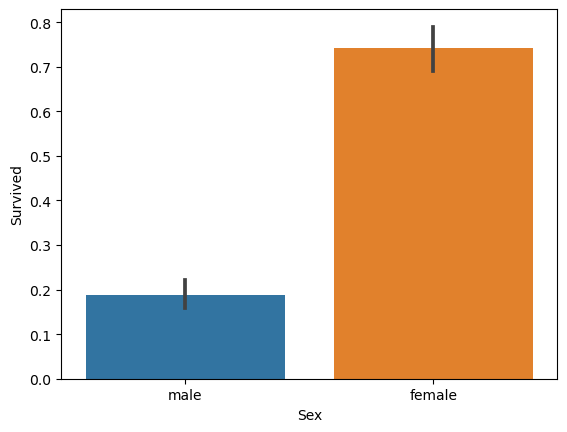

In [164]:
sns.barplot(x='Sex', y='Survived', data=df)

c:\Users\user\anaconda3\envs\myenv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\anaconda3\envs\myenv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\anaconda3\envs\myenv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\anaconda3\envs\myenv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Categorica

<Axes: xlabel='Pclass', ylabel='Survived'>

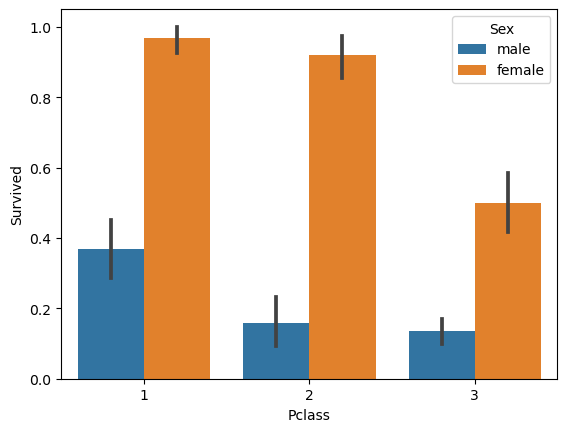

In [165]:
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=df)

c:\Users\user\anaconda3\envs\myenv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\anaconda3\envs\myenv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\anaconda3\envs\myenv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


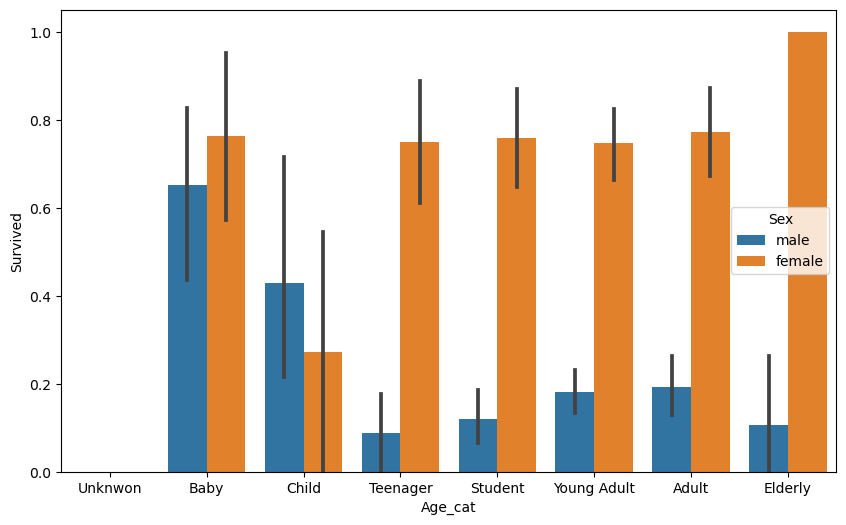

In [166]:
def get_category(age) :
    cat = ''
    if age <= -1 : cat = 'Unknown'
    elif age <= 5 : cat = 'Baby'
    elif age <= 12 : cat = 'Child'
    elif age <= 18 : cat = 'Teenager'
    elif age <=25 : cat = 'Student'
    elif age <= 35 : cat = 'Young Adult'
    elif age <= 60 : cat = 'Adult'
    else : cat = 'Elderly'

    return cat

plt.figure(figsize=(10,6))

group_names = ['Unknwon', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Elderly']

df['Age_cat'] = df['Age'].apply(lambda x : get_category(x))
sns.barplot(x='Age_cat', y='Survived', hue='Sex', data=df, order=group_names)
df.drop('Age_cat', axis=1, inplace=True)

In [168]:
from sklearn.preprocessing import OneHotEncoder

features = ['Cabin', 'Sex', 'Embarked']

# OneHotEncoder 초기화
oe = OneHotEncoder(sparse=False)  # 결과를 밀집 배열 형태로 반환

# 원-핫 인코딩 적용
encoded_matrix = oe.fit_transform(df[features])

# 인코딩된 데이터를 DataFrame으로 변환
encoded_df = pd.DataFrame(encoded_matrix, columns=oe.get_feature_names_out(features))

# 원본 DataFrame에서 인코딩할 열 제거
df = df.drop(features, axis=1)

# 인코딩된 DataFrame을 원본 DataFrame에 병합
df = pd.concat([df, encoded_df], axis=1)

# 결과 출력
df.head()

c:\Users\user\anaconda3\envs\myenv\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin_A,...,Cabin_F,Cabin_G,Cabin_N,Cabin_T,Sex_female,Sex_male,Embarked_C,Embarked_N,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [169]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin_A        0
Cabin_B        0
Cabin_C        0
Cabin_D        0
Cabin_E        0
Cabin_F        0
Cabin_G        0
Cabin_N        0
Cabin_T        0
Sex_female     0
Sex_male       0
Embarked_C     0
Embarked_N     0
Embarked_Q     0
Embarked_S     0
dtype: int64

In [170]:
df.drop(['PassengerId','Name','Ticket'], axis=1, inplace=True)

In [171]:
X_df = df.drop('Survived',axis=1)
y_df = df['Survived']

In [172]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.2, random_state=11)

In [175]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression(solver='liblinear')

dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
print(accuracy_score(y_test, dt_pred))

rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
print(accuracy_score(y_test, rf_pred))

lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
print(accuracy_score(y_test, lr_pred))

0.8212290502793296
0.8379888268156425
0.8491620111731844


In [181]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lr_clf, X_df, y_df, scoring='accuracy', cv=5)
print(np.mean(scores))

0.7946393823363255


In [188]:
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth': np.arange(2,10),
              'min_samples_split' : np.arange(2,10),
              'min_samples_leaf' : np.arange(1,10)}

grid_dclf = GridSearchCV(dt_clf, param_grid=parameters, scoring='accuracy', cv=5)
grid_dclf.fit(X_train, y_train)

print(grid_dclf.best_params_, grid_dclf.best_score_)
best_dclf = grid_dclf.best_estimator_

{'max_depth': 3, 'min_samples_leaf': 3, 'min_samples_split': 2} 0.807613513247316
